In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# from ipwhois import IPWhois

In [5]:
data = pd.read_csv('/home/thomas/ww/scidm_log/log/dataset.csv', header=None, names=['ip', 'dataset','download', 'date', 'size', 'request', 'user-agent'])
data.head()

,ip,dataset,download,date,size,request,user-agent
0,66.249.71.10,False,False,20/Jun/2019:06:25:23 +0800,806,GET /robots.txt HTTP/1.0,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...
1,66.249.71.10,False,False,20/Jun/2019:06:25:23 +0800,564,GET /rating/dataset/frg0606/1 HTTP/1.0,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...
2,66.249.71.11,False,False,20/Jun/2019:06:25:26 +0800,6464,GET /dataset/frg0606 HTTP/1.0,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...
3,40.77.167.163,60e0a685-9454-44e7-83e5-09a87264f04e,False,20/Jun/2019:06:30:51 +0800,7686,GET /dataset/nih-clinical-center-deeplesion/re...,Mozilla/5.0 (compatible; bingbot/2.0; +http://...
4,66.249.71.9,False,False,20/Jun/2019:06:32:53 +0800,806,GET /robots.txt HTTP/1.0,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...


In [6]:
data2 = pd.read_csv('/home/thomas/ww/scidm_log/log/dataset-group.csv', header=None, names=['ip', 'dataset','download', 'date', 'size', 'request', 'user-agent'])
data2.head()

,ip,dataset,download,date,size,request,user-agent
research,40.77.167.163,60e0a685-9454-44e7-83e5-09a87264f04e,False,20/Jun/2019:06:30:51 +0800,7686,GET /dataset/nih-clinical-center-deeplesion/re...,Mozilla/5.0 (compatible; bingbot/2.0; +http://...
research,5.45.207.63,0272e4d2-09d5-45e8-bbf0-c318fab67308,False,20/Jun/2019:06:52:04 +0800,9014,GET /dataset/open-images HTTP/1.0,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...
research,66.102.8.136,c4b42f2d-ef31-4a13-b65a-75896396eb5c,False,20/Jun/2019:07:52:02 +0800,5359,GET /dataset/cargo-2000-freight-tracking-and-t...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
research,66.102.8.136,c4b42f2d-ef31-4a13-b65a-75896396eb5c,True,20/Jun/2019:07:52:06 +0800,1736,GET /dataset/cargo-2000-freight-tracking-and-t...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
research,179.6.201.94,c4b42f2d-ef31-4a13-b65a-75896396eb5c,False,20/Jun/2019:07:52:13 +0800,241,OPTIONS /dataset/c4b42f2d-ef31-4a13-b65a-75896...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...


In [7]:
data3 = pd.read_csv('/home/thomas/ww/scidm_log/log/dataset-organization.csv', header=None, names=['ip', 'dataset','download', 'date', 'size', 'request', 'user-agent'])
data3.head()

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ip,dataset,download,date,size,request,user-agent
False,66.249.71.10,False,False,20/Jun/2019:06:25:23 +0800,806,GET /robots.txt HTTP/1.0,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...
False,66.249.71.10,False,False,20/Jun/2019:06:25:23 +0800,564,GET /rating/dataset/frg0606/1 HTTP/1.0,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...
False,66.249.71.11,False,False,20/Jun/2019:06:25:26 +0800,6464,GET /dataset/frg0606 HTTP/1.0,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...
aidm,40.77.167.163,60e0a685-9454-44e7-83e5-09a87264f04e,False,20/Jun/2019:06:30:51 +0800,7686,GET /dataset/nih-clinical-center-deeplesion/re...,Mozilla/5.0 (compatible; bingbot/2.0; +http://...
False,66.249.71.9,False,False,20/Jun/2019:06:32:53 +0800,806,GET /robots.txt HTTP/1.0,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...


# 前十大 IP

In [8]:
ip_count = pd.DataFrame({'count' : data.groupby(['ip']).size()}).reset_index().sort_values('count', ascending=False).head(100)

save_source = []
for IP in ip_count['ip']:
    try:
        obj = IPWhois(IP.strip())

    except Exception as e:
        obj = 'error'
        
    while True:
        try:
            results = obj.lookup_rdap(depth=1)
        except Exception as e:
            if 'HTTP lookup failed' in str(e):
                results['asn_country_code'] = 'error'
                source = str(e)
                break
            else:
                continue
        break

#     # 判斷 ip 來源
    if results['asn_country_code'] == 'error':
        save_source.append(source)
    elif results['asn_country_code'] == 'TW':
        if 'TANET' in results['network']['name']:
            source = '學術單位'
            save_source.append(source)
        elif results['network']['name'] == 'GSN-NET':
            source = '政府機關'
            save_source.append(source)
        else:
            source = '企業民眾'
            save_source.append(source)
    elif results['asn_country_code'] != 'TW':
        source = '海外民眾'
        save_source.append(source)

print(len(save_source))
ip_count['source'] = save_source

ip_count

KeyboardInterrupt: 

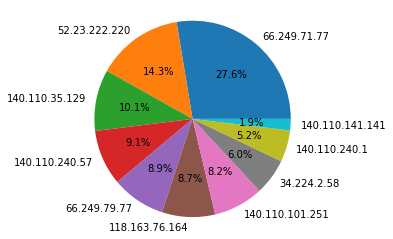

In [5]:
plt.pie(ip_count['count'], labels = ip_count['ip'], autopct = '%1.1f%%')
plt.axis('equal')
plt.show()

# 有下載動作的 IP

In [6]:
for_ip_dataframe = data[data['download'] == True]
for_ip_dataframe.head()

,ip,dataset,download,date,size,request
132,66.249.79.236,21bdade4-f5e1-46ca-a969-2c8c8e5cd71c,True,17/Oct/2018:06:25:58 +0800,2696,GET /dataset/insight_classifiction_dataset_7_1...
148,66.249.71.139,e8c17e69-fb72-4fa0-92bf-03bf5e8959c1,True,17/Oct/2018:06:26:05 +0800,1546,GET /dataset/lass-2018q3/resource/493cea3d-e9c...
155,66.249.71.139,fe1649d3-9710-4133-9366-a1acc2722c76,True,17/Oct/2018:06:26:11 +0800,2178,GET /dataset/376570000a-000039/resource/817044...
164,66.249.71.139,f498e5df-e08c-4b7f-a977-d4fa6920e004,True,17/Oct/2018:06:26:12 +0800,2693,GET /dataset/insight_classifiction_dataset_7_1...
1135,66.249.71.141,81ac615f-efb0-4717-ae2a-19fddf3da4dd,True,17/Oct/2018:06:35:47 +0800,2561,GET /dataset/insight_classifiction_dataset_7_1...


In [7]:
ip_count2 = pd.DataFrame({'count' : for_ip_dataframe.groupby(['ip']).size()}).reset_index().sort_values('count', ascending=False).head(10)
ip_count2

,ip,count
770,66.249.71.139,2489
769,66.249.71.13,2196
680,52.23.222.220,1391
567,34.224.2.58,1277
809,66.249.79.236,894
771,66.249.71.14,825
795,66.249.71.77,791
821,66.249.79.50,574
827,66.249.79.77,477
777,66.249.71.15,458


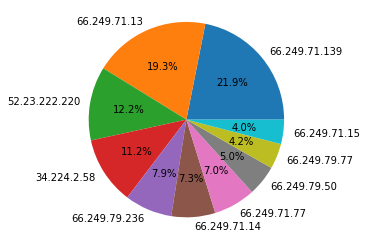

In [8]:
plt.pie(ip_count2['count'], labels = ip_count2['ip'], autopct = '%1.1f%%')
plt.axis('equal')
plt.show()

# 前十大資料集

In [9]:
datasetdata = data[~data['dataset'].isin(['False'])]
dataset_count = pd.DataFrame({'count' : datasetdata.groupby(['dataset']).size()}).reset_index().sort_values('count', ascending=False).head(10)
dataset_count

,dataset,count
13,0080258d-3658-47ee-b2cf-cba8b2f6e72e,7040
3909,78bb96a8-d88c-4d04-8d82-407f4510dc07,2407
4122,7f7a049e-a512-420b-a989-f2112e800a25,2397
3963,7a23dd3e-642c-4a0e-8cb9-3793ff64948b,2333
6582,cc806774-cec6-47ae-8f69-069832a81033,1897
7517,e8c17e69-fb72-4fa0-92bf-03bf5e8959c1,1688
4272,8406285b-e878-4033-98ea-ad5aa58db9af,1536
7928,f48a6e9f-607a-45f6-a446-d9fe5e1ba9b5,1517
4732,92699b39-0825-4801-8426-5ee00cede691,1454
5857,b5563771-bd75-4d63-81ba-12945e40c4db,1452


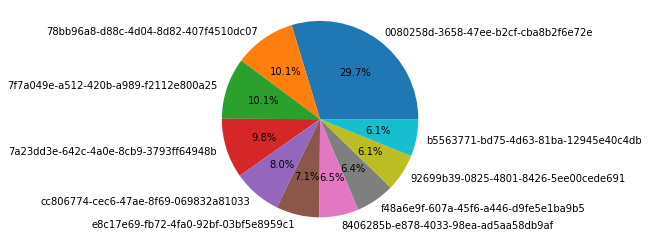

In [10]:
plt.pie(dataset_count['count'], labels = dataset_count['dataset'], autopct = '%1.1f%%')
plt.axis('equal')
plt.show()

# 有被下載的資料集

In [11]:
dataset_count2 = pd.DataFrame({'count' : for_ip_dataframe.groupby(['dataset']).size()}).reset_index().sort_values('count', ascending=False).head(10)
dataset_count2

,dataset,count
863,False,1329
1211,da1ff08e-2a2e-4acb-9e8c-09649ceaf1fc,676
797,94312a47-b17c-4a1b-b971-d1815df986fb,553
10,0272e4d2-09d5-45e8-bbf0-c318fab67308,469
1270,e32bd551-b3ff-4043-bf39-5eaa6fb2f40c,450
693,8406285b-e878-4033-98ea-ad5aa58db9af,410
637,7a23dd3e-642c-4a0e-8cb9-3793ff64948b,408
788,92699b39-0825-4801-8426-5ee00cede691,405
979,b5563771-bd75-4d63-81ba-12945e40c4db,397
686,81ac615f-efb0-4717-ae2a-19fddf3da4dd,371


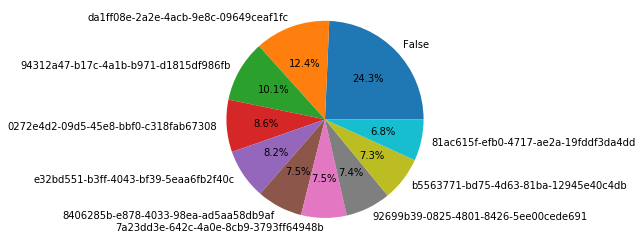

In [12]:
plt.pie(dataset_count2['count'], labels = dataset_count2['dataset'], autopct = '%1.1f%%')
plt.axis('equal')
plt.show()

# 前十大 group

In [52]:
groupdata = pd.read_csv('log/dataset-group.csv', header=None)
groupdata.head()

,0,1,2,3,4,5,6,7
0,research,40.77.167.163,60e0a685-9454-44e7-83e5-09a87264f04e,False,20/Jun/2019:06:30:51 +0800,7686,GET /dataset/nih-clinical-center-deeplesion/re...,Mozilla/5.0 (compatible; bingbot/2.0; +http://...
1,research,5.45.207.63,0272e4d2-09d5-45e8-bbf0-c318fab67308,False,20/Jun/2019:06:52:04 +0800,9014,GET /dataset/open-images HTTP/1.0,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...
2,research,66.102.8.136,c4b42f2d-ef31-4a13-b65a-75896396eb5c,False,20/Jun/2019:07:52:02 +0800,5359,GET /dataset/cargo-2000-freight-tracking-and-t...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
3,research,66.102.8.136,c4b42f2d-ef31-4a13-b65a-75896396eb5c,True,20/Jun/2019:07:52:06 +0800,1736,GET /dataset/cargo-2000-freight-tracking-and-t...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
4,research,179.6.201.94,c4b42f2d-ef31-4a13-b65a-75896396eb5c,False,20/Jun/2019:07:52:13 +0800,241,OPTIONS /dataset/c4b42f2d-ef31-4a13-b65a-75896...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...


In [82]:
groupdata = pd.read_csv('log/dataset-group.csv', header=None, names=['group', 'ip', 'dataset','download', 'date', 'size', 'request', 'refer'])
groupdata.head()

,group,ip,dataset,download,date,size,request,refer
0,research,40.77.167.163,60e0a685-9454-44e7-83e5-09a87264f04e,False,20/Jun/2019:06:30:51 +0800,7686,GET /dataset/nih-clinical-center-deeplesion/re...,Mozilla/5.0 (compatible; bingbot/2.0; +http://...
1,research,5.45.207.63,0272e4d2-09d5-45e8-bbf0-c318fab67308,False,20/Jun/2019:06:52:04 +0800,9014,GET /dataset/open-images HTTP/1.0,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...
2,research,66.102.8.136,c4b42f2d-ef31-4a13-b65a-75896396eb5c,False,20/Jun/2019:07:52:02 +0800,5359,GET /dataset/cargo-2000-freight-tracking-and-t...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
3,research,66.102.8.136,c4b42f2d-ef31-4a13-b65a-75896396eb5c,True,20/Jun/2019:07:52:06 +0800,1736,GET /dataset/cargo-2000-freight-tracking-and-t...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
4,research,179.6.201.94,c4b42f2d-ef31-4a13-b65a-75896396eb5c,False,20/Jun/2019:07:52:13 +0800,241,OPTIONS /dataset/c4b42f2d-ef31-4a13-b65a-75896...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...


In [117]:
groupdata = pd.read_csv('log/dataset-group.csv', header=None, names=['group', 'ip', 'dataset','download', 'date', 'size', 'request', 'refer'])
groupdata['date'] = pd.to_datetime(groupdata['date'], format= '%d/%b/%Y:%H:%M:%S +0800', utc=True)
groupdata.sort_values('date', inplace=True)
tg = groupdata[(groupdata['date'] < '2019-01-01')]
#tg = groupdata[(groupdata['date'] > '2019-08-01') & (groupdata['date'] < '2019-08-02')]
#tg.loc[tg['group'] == 'voice']
tg.head()

,group,ip,dataset,download,date,size,request,refer
311432,research,61.244.168.162,9760dec7-308e-41c5-950f-517e9439c6a4,False,2018-05-11 12:24:13+00:00,4898,GET /dataset/20-newsgroups HTTP/1.0,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:59....
311433,research,61.244.168.162,9760dec7-308e-41c5-950f-517e9439c6a4,False,2018-05-11 12:24:20+00:00,4265,GET /dataset/20-newsgroups/resource/75613c4c-b...,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:59....
311434,research,61.244.168.162,9760dec7-308e-41c5-950f-517e9439c6a4,True,2018-05-11 12:24:39+00:00,14667241,GET /dataset/9760dec7-308e-41c5-950f-517e9439c...,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:59....
311430,research,37.9.113.191,ef890176-6fd9-499d-9687-5fe2863c6941,False,2018-05-12 06:39:45+00:00,8116,GET /dataset/mnist HTTP/1.0,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...
311431,research,42.76.238.28,7486ef1c-c590-442f-b3c7-d71cf52bcc0e,False,2018-05-12 08:02:28+00:00,8117,GET /dataset/eland-001 HTTP/1.0,Mozilla/5.0 (Android 6.0.1; Mobile; rv:49.0) G...


In [115]:
#tg
tg.groupby(['group'])['dataset'].nunique()

group
ai-ml                  2
environment           47
life                  21
medical               16
nchc_ai_bus01          5
publicinformation     39
research             495
traffic               11
Name: dataset, dtype: int64

In [116]:
tgd = tg[tg['download'] == True]
#tgd
tgd.groupby(['group'])['dataset'].nunique()

group
ai-ml                  2
environment           36
life                  16
medical               15
nchc_ai_bus01          5
publicinformation     24
research             278
traffic               10
Name: dataset, dtype: int64

In [66]:
groupdata = pd.read_csv('log/dataset-group.csv', header=None, names=['group', 'ip', 'dataset','download', 'date', 'size', 'request', 'refer'])
groupdata['date'] = pd.to_datetime(groupdata['date'], format= '%d/%b/%Y:%H:%M:%S +0800', utc=True)
groupdata.sort_values('date', inplace=True)
groupdata = groupdata[(groupdata['date'] > '2019-07-01') & (groupdata['date'] < '2019-07-30')]
#groupdata = groupdata.drop([4], axis = 1)
groupdata = groupdata.rename(index=str, columns={0:'group', 1:'ip', 2:'dataset', 3:'download'})
group_count = pd.DataFrame({'count' : groupdata.groupby(['group']).size()}).reset_index().sort_values('count', ascending=False).head(20)
group_count

,group,count
7,research,12220
1,environment,7233
6,publicinformation,4282
9,voice,3347
2,life,3105
3,medical,1379
8,traffic,422
4,nchc_ai_bus01,151
0,ai-ml,110
5,pacific-rim-application-and-grid-middleware-as...,12


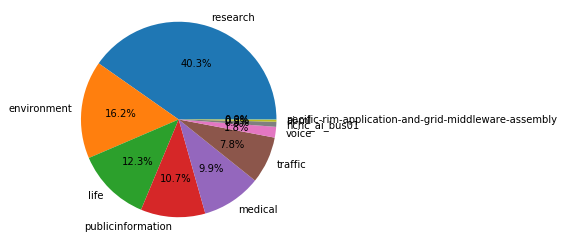

In [18]:
plt.pie(group_count['count'], labels = group_count['group'], autopct = '%1.1f%%')
plt.axis('equal')
plt.show()

# 有被 Download 的前十大 group

In [19]:
download_group_data = groupdata[groupdata['download'] == True]
download_group_data.head()

,group,ip,dataset,download,5,6,7
3,research,66.102.8.136,c4b42f2d-ef31-4a13-b65a-75896396eb5c,True,1736,GET /dataset/cargo-2000-freight-tracking-and-t...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
14,medical,140.109.125.68,661156b3-d357-465c-8967-b4baebde0209,True,4734,GET /dataset/v1_mtss/resource/72dfbd3a-2958-4d...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5...
15,medical,140.109.125.68,661156b3-d357-465c-8967-b4baebde0209,True,159600,GET /dataset/661156b3-d357-465c-8967-b4baebde0...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5...
16,medical,140.109.125.68,661156b3-d357-465c-8967-b4baebde0209,True,159576,GET /dataset/661156b3-d357-465c-8967-b4baebde0...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5...
24,publicinformation,36.230.202.19,6d123f0d-9f45-491e-8bb4-387b82d651d4,True,121955,GET /dataset/6d123f0d-9f45-491e-8bb4-387b82d65...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4...


In [20]:
download_group_data

,group,ip,dataset,download,5,6,7
3,research,66.102.8.136,c4b42f2d-ef31-4a13-b65a-75896396eb5c,True,1736,GET /dataset/cargo-2000-freight-tracking-and-t...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
14,medical,140.109.125.68,661156b3-d357-465c-8967-b4baebde0209,True,4734,GET /dataset/v1_mtss/resource/72dfbd3a-2958-4d...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5...
15,medical,140.109.125.68,661156b3-d357-465c-8967-b4baebde0209,True,159600,GET /dataset/661156b3-d357-465c-8967-b4baebde0...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5...
16,medical,140.109.125.68,661156b3-d357-465c-8967-b4baebde0209,True,159576,GET /dataset/661156b3-d357-465c-8967-b4baebde0...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5...
24,publicinformation,36.230.202.19,6d123f0d-9f45-491e-8bb4-387b82d651d4,True,121955,GET /dataset/6d123f0d-9f45-491e-8bb4-387b82d65...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4...
25,environment,36.230.202.19,6d123f0d-9f45-491e-8bb4-387b82d651d4,True,121955,GET /dataset/6d123f0d-9f45-491e-8bb4-387b82d65...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4...
26,research,36.230.202.19,6d123f0d-9f45-491e-8bb4-387b82d651d4,True,121955,GET /dataset/6d123f0d-9f45-491e-8bb4-387b82d65...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4...
34,medical,66.249.71.10,8cd3ddc6-b9ae-4a18-923a-c08022fa1fa0,True,3001228,GET /dataset/8cd3ddc6-b9ae-4a18-923a-c08022fa1...,Googlebot-Image/1.0
43,environment,117.56.164.73,7a23dd3e-642c-4a0e-8cb9-3793ff64948b,True,7367743,GET /dataset/7a23dd3e-642c-4a0e-8cb9-3793ff649...,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...
44,life,117.56.164.73,7a23dd3e-642c-4a0e-8cb9-3793ff64948b,True,7367743,GET /dataset/7a23dd3e-642c-4a0e-8cb9-3793ff649...,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...


In [21]:
group_count2 = pd.DataFrame({'count' : download_group_data.groupby(['group']).size()}).reset_index().sort_values('count', ascending=False).head(10)
group_count2

,group,count
7,research,25390
1,environment,16295
2,life,11332
6,publicinformation,7554
3,medical,5698
8,traffic,3538
9,voice,2015
4,nchc_ai_bus01,463
0,ai-ml,128
5,pacific-rim-application-and-grid-middleware-as...,47


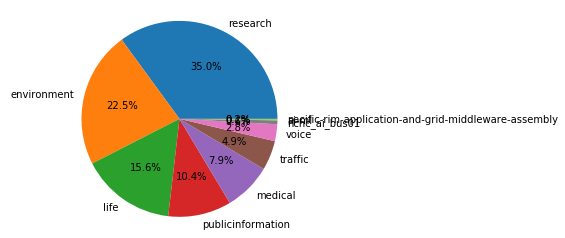

In [22]:
plt.pie(group_count2['count'], labels = group_count2['group'], autopct = '%1.1f%%')
plt.axis('equal')
plt.show()

# 前十大組織

In [22]:
organization_data = pd.read_csv('dataset-organization.csv', header=None)
organization_data.head()

,0,1,2,3,4,5,6
0,False,140.110.141.141,False,False,17/Oct/2018:06:25:10 +0800,424,POST /api/action/package_create HTTP/1.0
1,False,140.110.141.141,False,False,17/Oct/2018:06:25:13 +0800,424,POST /api/action/package_create HTTP/1.0
2,False,140.110.141.141,False,False,17/Oct/2018:06:25:13 +0800,424,POST /api/action/package_create HTTP/1.0
3,False,140.110.141.141,False,False,17/Oct/2018:06:25:13 +0800,424,POST /api/action/package_create HTTP/1.0
4,False,140.110.141.141,False,False,17/Oct/2018:06:25:13 +0800,424,POST /api/action/package_create HTTP/1.0


In [23]:
organization_data = pd.read_csv('dataset-organization.csv', header=None, names = ['org', 'ip', 'dataset', 'download', 'date', 'size', 'requests'])
organization_data.head()

,org,ip,dataset,download,date,size,requests
0,False,140.110.141.141,False,False,17/Oct/2018:06:25:10 +0800,424,POST /api/action/package_create HTTP/1.0
1,False,140.110.141.141,False,False,17/Oct/2018:06:25:13 +0800,424,POST /api/action/package_create HTTP/1.0
2,False,140.110.141.141,False,False,17/Oct/2018:06:25:13 +0800,424,POST /api/action/package_create HTTP/1.0
3,False,140.110.141.141,False,False,17/Oct/2018:06:25:13 +0800,424,POST /api/action/package_create HTTP/1.0
4,False,140.110.141.141,False,False,17/Oct/2018:06:25:13 +0800,424,POST /api/action/package_create HTTP/1.0


In [24]:
organization_data = organization_data[organization_data['org'] != 'False']
organization_data.head()

,org,ip,dataset,download,date,size,requests
59,ipgod-nchc,66.249.71.143,7f7a049e-a512-420b-a989-f2112e800a25,False,17/Oct/2018:06:25:21 +0800,12251,GET /dataset/315070700h-000015/resource/8955fe...
97,ipgod-nchc,66.249.71.139,a8b7d7e7-f559-4281-8885-1723bcdb0f98,False,17/Oct/2018:06:25:41 +0800,4188,GET /dataset/a09000000e-000240/resource/514870...
104,ipgod-nchc,66.249.79.238,42ecd9c7-6dd0-4c77-9de7-3b2391dd50ae,False,17/Oct/2018:06:25:44 +0800,4278,GET /dataset/379730000a-001433/resource/469aa7...
107,nchc-clean-data,66.249.71.139,21bdade4-f5e1-46ca-a969-2c8c8e5cd71c,False,17/Oct/2018:06:25:46 +0800,11403,GET /dataset/insight_classifiction_dataset_7_1...
113,nchc-clean-data,66.249.79.236,21bdade4-f5e1-46ca-a969-2c8c8e5cd71c,False,17/Oct/2018:06:25:49 +0800,11301,GET /dataset/insight_classifiction_dataset_7_1...


In [25]:
org_count = pd.DataFrame({'count' : organization_data.groupby(['org']).size()}).reset_index().sort_values('count', ascending=False)
org_count

,org,count
11,ipgod-nchc,53462
1,data-tainan-gov,14745
12,kcg-data,13440
4,environment-quality,13017
6,github-archive,7724
18,nchc-clean-data,6937
0,aidm,3703
15,nantou-opendata,3506
8,hccg-opendata,3252
7,gov-wra,2464


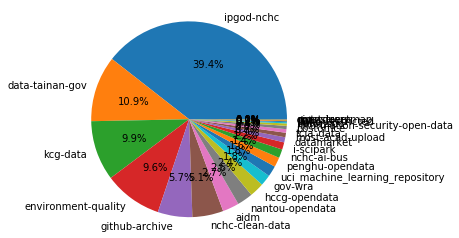

In [26]:
plt.pie(org_count['count'], labels = org_count['org'], autopct = '%1.1f%%')
plt.axis('equal')
plt.show()

In [27]:
all_org_count = pd.DataFrame({'count' : organization_data.groupby(['org']).size()}).reset_index().sort_values('count', ascending=False)
all_org_count

,org,count
11,ipgod-nchc,42186
1,data-tainan-gov,12702
12,kcg-data,10305
4,environment-quality,9036
6,github-archive,7180
0,aidm,3279
15,nantou-opendata,2766
7,gov-wra,2616
8,hccg-opendata,2460
25,uci_machine_learning_repository,2459


# 有被 Download 的前十大 org

In [28]:
download_org = organization_data[organization_data['download'] == True]
download_org.head()

,org,ip,dataset,download,requests
42,hccg-opendata,114.137.146.113,abc335a7-1c27-49cc-b153-2fe023a41afe,True,GET /dataset/traffic-20150128-103132-7393/reso...
743,gov-wra,66.249.71.13,910df3d1-8162-4f67-97f8-88fc89826681,True,GET /dataset/groundwaterwaterlevelobservationw...
768,kcg-data,66.249.71.13,8f1b8a42-6c49-47fe-a341-5b792ba7a6d7,True,GET /dataset/107-20/resource/749ba0a8-caad-471...
778,ipgod-nchc,66.249.71.13,8dad97de-6d93-49f9-92ba-3f45169a2859,True,GET /dataset/376420000a-1511242101/resource/b5...
806,ipgod-nchc,111.241.32.5,70bcf2cf-1ae6-4262-995f-e47a9e3127ce,True,GET /dataset/380320000a-000095/resource/7a03a7...


In [29]:
org_count2 = pd.DataFrame({'count' : download_org.groupby(['org']).size()}).reset_index().sort_values('count', ascending=False).head(10)
org_count2

,org,count
4,environment-quality,1596
0,aidm,1368
9,ipgod-nchc,1216
10,kcg-data,902
22,uci_machine_learning_repository,433
2,datamarket,376
1,data-tainan-gov,313
7,i-scipark,276
14,nchc-ai-bus,249
12,nantou-opendata,245


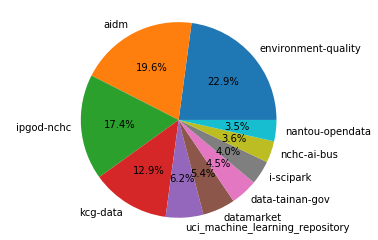

In [30]:
plt.pie(org_count2['count'], labels = org_count2['org'], autopct = '%1.1f%%')
plt.axis('equal')
plt.show()